In [21]:
from sklearn import datasets,metrics,svm
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

In [22]:
digits = datasets.load_digits()

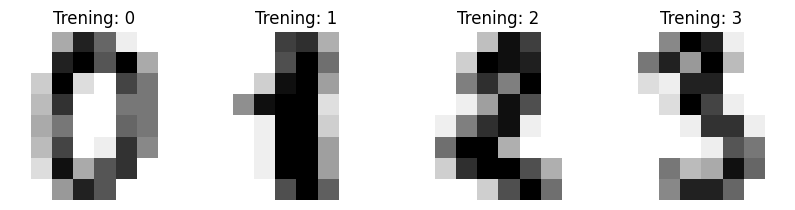

In [23]:
_, axes = plt.subplots(nrows=1,ncols=4,figsize=(10,3))
for ax,image,label in zip(axes,digits.images,digits.target):
    ax.set_axis_off()
    ax.imshow(image,cmap=plt.cm.gray_r,interpolation='nearest')
    ax.set_title(f"Trening: {label}")

In [24]:
n_samples = len(digits.images)
n_samples

1797

In [25]:
#stworzenie klasyfikatora SVM(Maszyna Wektrów Nośnych)
clf = svm.SVC(gamma=0.001,C=10)

In [26]:
#przekształcenie macirzy obrazów w wektory
data = digits.images.reshape((n_samples,-1))

In [27]:
#przygotowanie zbioru danych do treningu
X_train,X_test,y_train,y_test = train_test_split(data,digits.target,test_size=0.5,shuffle=False)
clf.fit(X_train,y_train)
predicted = clf.predict(X_test)

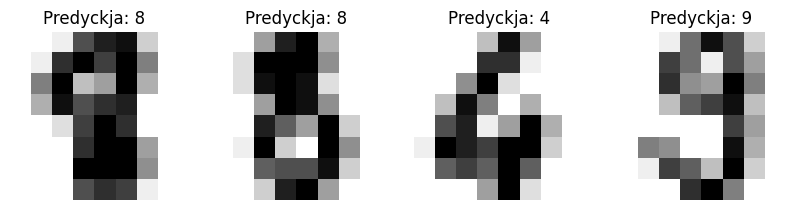

In [28]:
_, axes = plt.subplots(nrows=1,ncols=4,figsize=(10,3))
for ax,image,prediction in zip(axes,X_test,predicted):
    ax.set_axis_off()
    image = image.reshape(8,8)
    ax.imshow(image,cmap=plt.cm.gray_r,interpolation='nearest')
    ax.set_title(f"Predyckja: {prediction}")

In [29]:
#ocena modelu
print(f"raport klasyfikacji dla klasyfikatora {clf}\n{metrics.classification_report(y_test,predicted)}\n")

raport klasyfikacji dla klasyfikatora SVC(C=10, gamma=0.001)
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        88
           1       0.99      0.96      0.97        91
           2       0.99      0.99      0.99        86
           3       0.98      0.90      0.94        91
           4       0.99      0.96      0.97        92
           5       0.95      0.96      0.95        91
           6       0.99      0.99      0.99        91
           7       0.98      0.99      0.98        89
           8       0.94      1.00      0.97        88
           9       0.92      0.98      0.95        92

    accuracy                           0.97       899
   macro avg       0.97      0.97      0.97       899
weighted avg       0.97      0.97      0.97       899




Text(0.5, 0.98, 'Macierz pomyłek')

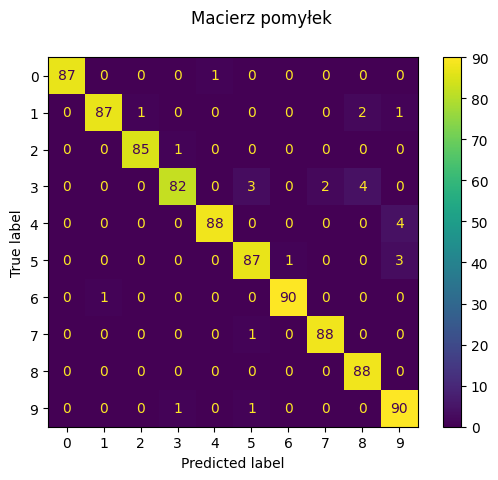

In [30]:
#macierz pomyłek
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test,predicted)
disp.figure_.suptitle("Macierz pomyłek")